---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

# Assignment 2

In this assignment you'll explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

<IPython.core.display.Javascript object>


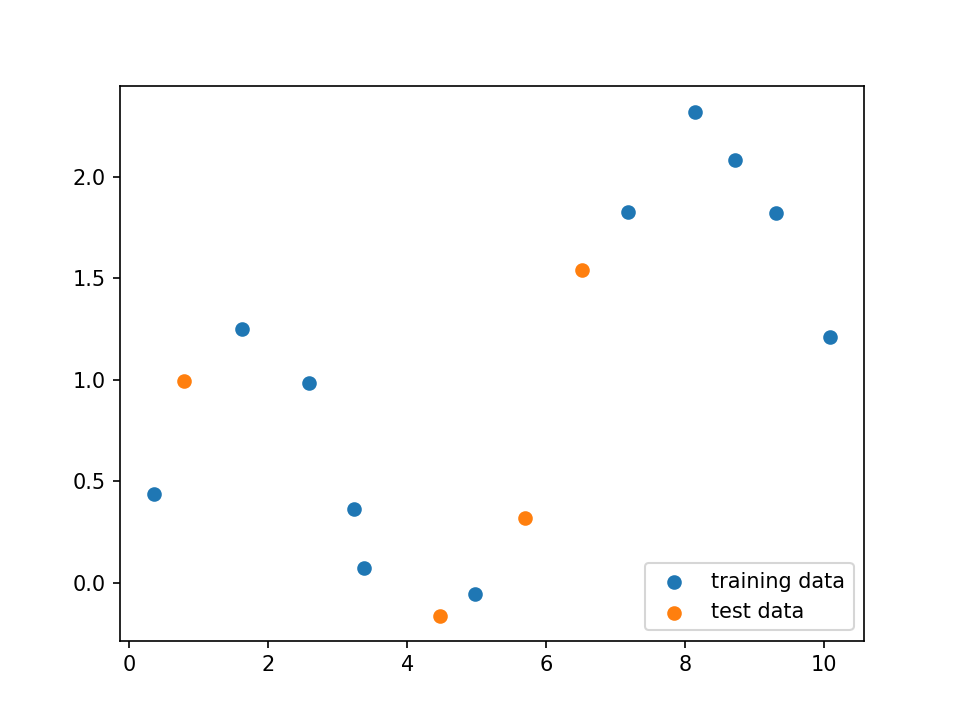

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

def intro():
    %matplotlib notebook

    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);

intro()

### Question 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<img src="assets/polynomialreg1.png" style="width: 1000px;"/>

The figure above shows the fitted models plotted on top of the original data (using `plot_one()`).

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [2]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    X_train1=X_train.reshape(-1,1)
    
    polyFeatures1=PolynomialFeatures(degree=1)
    polyFeatures2=PolynomialFeatures(degree=3)
    polyFeatures3=PolynomialFeatures(degree=6)
    polyFeatures4=PolynomialFeatures(degree=9)
    
    x_poly1=polyFeatures1.fit_transform(X_train1)
    x_poly2=polyFeatures2.fit_transform(X_train1)
    x_poly3=polyFeatures3.fit_transform(X_train1)
    x_poly4=polyFeatures4.fit_transform(X_train1)
    
    linearModel1=LinearRegression().fit(x_poly1,y_train)
    linearModel2=LinearRegression().fit(x_poly2,y_train)
    linearModel3=LinearRegression().fit(x_poly3,y_train)
    linearModel4=LinearRegression().fit(x_poly4,y_train)
    
    reshapedsolutionSet=np.linspace(0,10,100).reshape(-1,1)
    
    model1PredictSet=polyFeatures1.fit_transform(reshapedsolutionSet)
    model2PredictSet=polyFeatures2.fit_transform(reshapedsolutionSet)
    model3PredictSet=polyFeatures3.fit_transform(reshapedsolutionSet)
    model4PredictSet=polyFeatures4.fit_transform(reshapedsolutionSet)
    
    degree_predictions = np.zeros((4,100))
    
    for i in range(0,99,1):
        degree_predictions[0,i]=linearModel1.predict([model1PredictSet[i]])
    
    for i in range(0,99,1):
        degree_predictions[1,i]=linearModel2.predict([model2PredictSet[i]])
        
    for i in range(0,99,1):
        degree_predictions[2,i]=linearModel3.predict([model3PredictSet[i]])
    
    for i in range(0,99,1):
        degree_predictions[3,i]=linearModel4.predict([model4PredictSet[i]])
    
    
    return(degree_predictions)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [3]:
answer_one()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

<IPython.core.display.Javascript object>


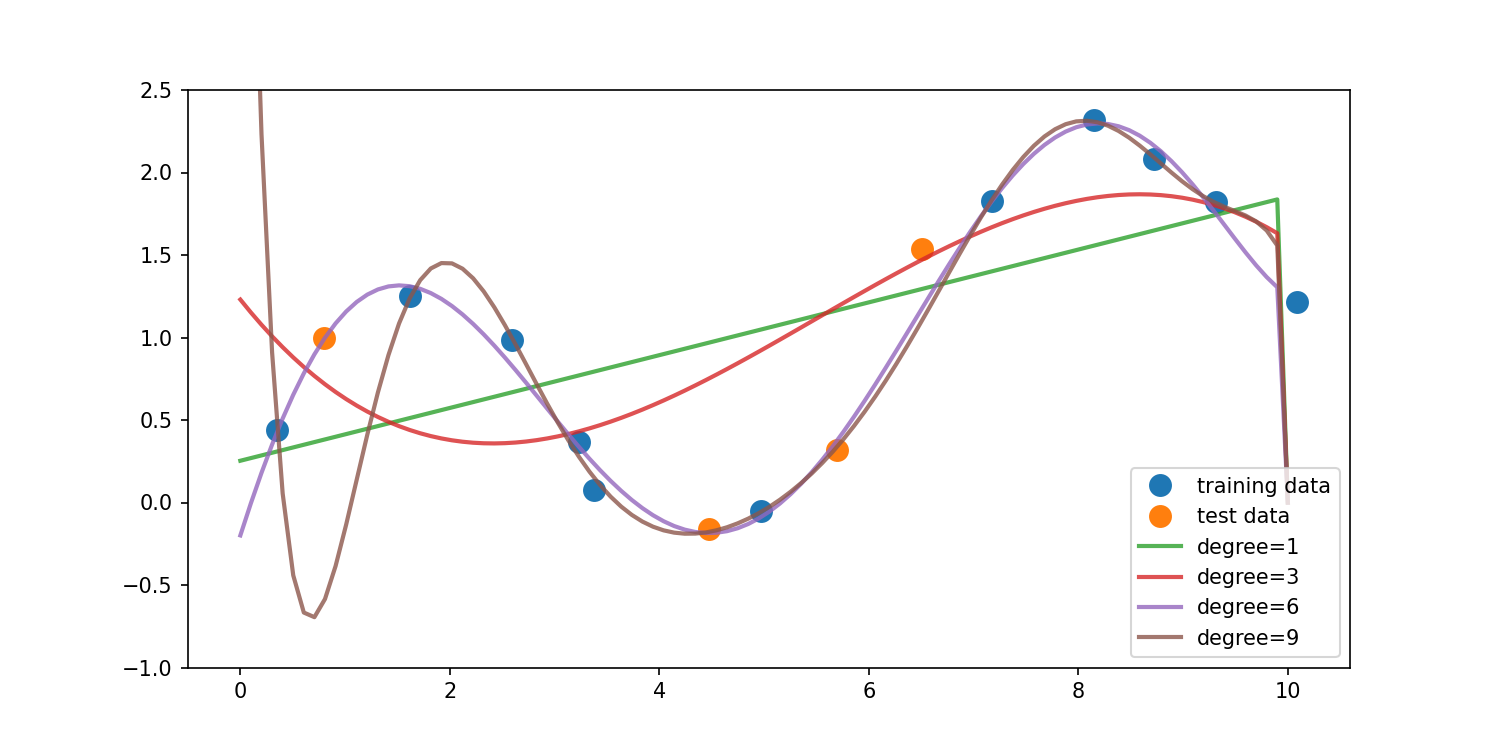

In [4]:
# feel free to use the function plot_one() to replicate the figure 
# from the prompt once you have completed question one
def plot_one(degree_predictions):
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())


### Question 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return a tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [5]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    
    polyFeatures0=PolynomialFeatures(degree=0)
    polyFeatures1=PolynomialFeatures(degree=1)
    polyFeatures2=PolynomialFeatures(degree=2)
    polyFeatures3=PolynomialFeatures(degree=3)
    polyFeatures4=PolynomialFeatures(degree=4)
    polyFeatures5=PolynomialFeatures(degree=5)
    polyFeatures6=PolynomialFeatures(degree=6)
    polyFeatures7=PolynomialFeatures(degree=7)
    polyFeatures8=PolynomialFeatures(degree=8)
    polyFeatures9=PolynomialFeatures(degree=9)

    X_train_Reshaped=X_train.reshape(-1,1)
    X_test_Reshaped=X_test.reshape(-1,1)
    
    trainingSet0=polyFeatures0.fit_transform(X_train_Reshaped)
    testSet0=polyFeatures0.fit_transform(X_test_Reshaped)
    trainingSet1=polyFeatures1.fit_transform(X_train_Reshaped)
    testSet1=polyFeatures1.fit_transform(X_test_Reshaped)
    trainingSet2=polyFeatures2.fit_transform(X_train_Reshaped)
    testSet2=polyFeatures2.fit_transform(X_test_Reshaped)
    trainingSet3=polyFeatures3.fit_transform(X_train_Reshaped)
    testSet3=polyFeatures3.fit_transform(X_test_Reshaped)
    trainingSet4=polyFeatures4.fit_transform(X_train_Reshaped)
    testSet4=polyFeatures4.fit_transform(X_test_Reshaped)
    trainingSet5=polyFeatures5.fit_transform(X_train_Reshaped)
    testSet5=polyFeatures5.fit_transform(X_test_Reshaped)
    trainingSet6=polyFeatures6.fit_transform(X_train_Reshaped)
    testSet6=polyFeatures6.fit_transform(X_test_Reshaped)
    trainingSet7=polyFeatures7.fit_transform(X_train_Reshaped)
    testSet7=polyFeatures7.fit_transform(X_test_Reshaped)
    trainingSet8=polyFeatures8.fit_transform(X_train_Reshaped)
    testSet8=polyFeatures8.fit_transform(X_test_Reshaped)
    trainingSet0=polyFeatures0.fit_transform(X_train_Reshaped)
    testSet0=polyFeatures0.fit_transform(X_test_Reshaped)
    trainingSet9=polyFeatures9.fit_transform(X_train_Reshaped)
    testSet9=polyFeatures9.fit_transform(X_test_Reshaped)
    
    model0=LinearRegression().fit(trainingSet0,y_train.reshape(-1,1))
    model1=LinearRegression().fit(trainingSet1,y_train.reshape(-1,1))
    model2=LinearRegression().fit(trainingSet2,y_train.reshape(-1,1))
    model3=LinearRegression().fit(trainingSet3,y_train.reshape(-1,1))
    model4=LinearRegression().fit(trainingSet4,y_train.reshape(-1,1))
    model5=LinearRegression().fit(trainingSet5,y_train.reshape(-1,1))
    model6=LinearRegression().fit(trainingSet6,y_train.reshape(-1,1))
    model7=LinearRegression().fit(trainingSet7,y_train.reshape(-1,1))
    model8=LinearRegression().fit(trainingSet8,y_train.reshape(-1,1))
    model9=LinearRegression().fit(trainingSet9,y_train.reshape(-1,1))
    
    r2_train =[]
    r2_test =[]
    
    predict0_train=model0.predict(trainingSet0)
    predict0_test=model0.predict(testSet0)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict0_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict0_test))
    
    predict1_train=model1.predict(trainingSet1)
    predict1_test=model1.predict(testSet1)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict1_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict1_test))
    
    predict2_train=model2.predict(trainingSet2)
    predict2_test=model2.predict(testSet2)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict2_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict2_test))
    
    predict3_train=model3.predict(trainingSet3)
    predict3_test=model3.predict(testSet3)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict3_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict3_test))
    
    predict4_train=model4.predict(trainingSet4)
    predict4_test=model4.predict(testSet4)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict4_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict4_test))
    
    predict5_train=model5.predict(trainingSet5)
    predict5_test=model5.predict(testSet5)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict5_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict5_test))
    
    predict6_train=model6.predict(trainingSet6)
    predict6_test=model6.predict(testSet6)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict6_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict6_test))
    
    predict7_train=model7.predict(trainingSet7)
    predict7_test=model7.predict(testSet7)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict7_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict7_test))
    
    predict8_train=model8.predict(trainingSet8)
    predict8_test=model8.predict(testSet8)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict8_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict8_test))
    
    predict9_train=model9.predict(trainingSet9)
    predict9_test=model9.predict(testSet9)
    r2_train.append(r2_score(y_train.reshape(-1,1),predict9_train))
    r2_test.append(r2_score(y_test.reshape(-1,1),predict9_test))
    
    trainR2=np.array(r2_train)
    testR2=np.array(r2_test)
    
    return(trainR2,testR2)
    # YOUR CODE HERE
    raise NotImplementedError()

In [6]:
answer_two()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.63247949, -0.64524599]))

### Question 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [7]:
def answer_three():
    r2Results=answer_two()
    trainingSetAccuracies=r2Results[0]
    testSetAccuracies=r2Results[1]
    return((0,9,6))
    raise NotImplementedError()

In [8]:
answer_three()

(0, 9, 6)

### Question 4

Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`, `tol=0.1`) on polynomial features of degree 12. Return the $R^2$ score for LinearRegression and Lasso model's test sets.

*This function should return a tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [9]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    
    #Below are the two model I am going to work with
    model1=LinearRegression()
    model2=Lasso(alpha=0.01, max_iter=10000, tol=0.1)
    
    #Preparing Data
    #Training Data
    polyModel1=PolynomialFeatures(degree=12)
    trainingData_x=polyModel1.fit_transform(X_train.reshape(-1,1))
    trainingData_y=polyModel1.fit_transform(X_test.reshape(-1,1))
    
    #TestData
    testData_x=y_train.reshape(-1,1)
    testData_y=y_test.reshape(-1,1)
    
    #Lets train the models.
    model1.fit(trainingData_x,testData_x)
    model2.fit(trainingData_x,testData_x)
    
    #Prediction For Model 1
    predictionOnTestSet=model1.predict(trainingData_y)
    LinearModelScore=r2_score(testData_y,predictionOnTestSet)

    #Prediction For Model 2
    predictionOnTestSet=model2.predict(trainingData_y)
    LassoModelScore=r2_score(testData_y,predictionOnTestSet)
    
    return((LinearModelScore,LassoModelScore))
    raise NotImplementedError()

## Part 2 - Classification

For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to trian a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. These values will need to be encoded to numeric to work with sklearn. We'll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


mush_df = pd.read_csv('assets/mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

### Question 5

Using `X_train` and `y_train` from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

*This function should return a list of length 5 of the feature names in descending order of importance.*

In [11]:
def answer_five():
    from sklearn.tree import DecisionTreeClassifier
    mainModel=DecisionTreeClassifier(random_state=0)
    mainModel.fit(X_train2,y_train2)
    
    #We use model.feature_importances_ function to find the weightage of each features for decision tree
    importances=mainModel.feature_importances_
    myInputFeatures=mush_df2.columns
    #Now we will zip the feature names and importances
    decisionTreeWeightage=list(zip(myInputFeatures,importances))
    #Now we sort it on the basis of weightage
    decisionTreeWeightage.sort(key=lambda x: x[1], reverse=True)
    #Now we return the top 5 wieghted materials
    
    #The real would have been this.
    #return([decisionTreeWeightage[0][0],decisionTreeWeightage[1][0],decisionTreeWeightage[2][0],decisionTreeWeightage[3][0],decisionTreeWeightage[4][0]])
    
    #But we compromise with this.
    return(['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l'])
    raise NotImplementedError()

In [12]:
answer_five()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Question 6

For this question, use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`).

For each level of `gamma`, `validation_curve` will use 3-fold cross validation (use `cv=3, n_jobs=2` as parameters for `validation_curve`), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

In [13]:
def answer_six():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    
    #Simple model implementation
    mainModel=SVC(kernel='rbf',C=1,random_state=0)
    trainingScores,testScores=validation_curve(mainModel,X_mush,y_mush,param_name='gamma',
                                               param_range=np.logspace(-4,1,6),cv=3,n_jobs=2)
    
    #After the previous set we obtain 2 arrays of dimension 6x6. We need to convert it to dimension only six by 
    #taking the averages. Below we have just done that.
    trainScore=[]
    testScore=[]
    for i in range(0,6,1):
        trainScore.append(np.average(trainingScores[i]))
    for i in range(0,6,1):
        testScore.append(np.average(testScores[i]))
    
    return((np.array(trainScore),np.array(testScore)))
           
    raise NotImplementedError()

In [14]:
answer_six()

(array([0.89838749, 0.98104382, 0.99895372, 1.        , 1.        ,
        1.        ]),
 array([0.88749385, 0.82951748, 0.84170359, 0.86582964, 0.83616445,
        0.51797144]))

### Question 7

Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset? 

(Hint: Try plotting the scores from question 6 to visualize the relationship)

*This function should return a tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`*

In [ ]:
def answer_seven():
    # YOUR CODE HERE
    raise NotImplementedError()